<a href="https://colab.research.google.com/github/vaibhavhirani/ML-Loan-Assignment/blob/main/baseline_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
os.listdir('/content/drive/MyDrive/')

['Getting started.pdf',
 'Loan Dataset',
 'Colab Notebooks',
 'filtered_loan_2017Q1.csv',
 'filtered_LoanStats_securev1_2017Q1.csv',
 'filtered_LoanStats3c_securev1_2014.csv',
 'filtered_LoanStats_securev1_2017Q3.csv',
 'filtered_LoanStats_securev1_2017Q2.csv',
 'filtered_LoanStats3d_securev1_2015.csv',
 'Ficoed',
 'ML_Loan']

In [58]:
loan_data = pd.read_csv("./drive/MyDrive/ML_Loan/Baseline/cleaned_loan_data.csv", sep=",")

In [59]:
data = loan_data
loan_data.head()
loan_data.shape

(457662, 86)

In [60]:
loan_data.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
count,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,4.576620e+05,457662.000000,457662.000000,457662.000000,457662.0,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.00000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,4.576620e+05,457662.000000,457662.00000,457662.000000,457662.0,457662.0,457662.000000,457662.000000,457662.000000,457662.000000,4.576620e+05,...,457662.000000,457662.000000,457662.000000,457662.0,457662.000000,457662.000000,4.576620e+05,4.576620e+05,4.576620e+05,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,457662.000000,4.576620e+05,4.576620e+05,457662.000000,4.576620e+05,457662.0,457662.000000,457662.000000
mean,228859.628326,14559.942600,14559.942600,14554.630424,0.254935,90.070447,440.270832,2.504735,16.794433,63062.621896,3.982939,2.707981,7.585263e+04,0.886220,15.774388,0.783493,0.0,11.507064,907.708617,448.327126,21.016453,18.350558,0.337470,348.58307,693.359947,697.360054,0.697371,11.800558,0.239913,1.629531e+04,611.333259,26.01519,0.566280,0.0,0.0,14537.278440,14532.182055,12100.387456,2210.831596,1.046612e+00,...,674.471982,657.426736,0.018273,1.0,0.003297,0.005696,2.721372e+02,1.402815e+05,3.184950e+04,4.810764,13341.935009,0.010497,12.947560,182.479432,12.497227,7.519211,1.773623,0.532382,3.632093,5.706128,4.713664,8.379855,8.766411,8.348146,15.196580,5.652436,11.747108,0.003666,0.094371,2.236288,94.141312,0.148590,0.056824,1.721595e+05,4.976349e+04,20745.260216,4.174054e+04,0.0,0.999974,0.982044
std,132135.178141,8536.723785,8536.723785,8533.428059,0.435825,58.910061,254.207166,1.830379,10.275194,39202.334796,3.798128,0.645681,6.591027e+04,0.833514,8.829657,0.411864,0.0,2.453626,272.573828,268.885004,14.921870,8.886741,0.909225,189.24664,30.479932,30.480467,0.978793,5.469185,0.634354,2.229401e+04,354.925060,12.16476,0.495588,0.0,0.0,9969.888250,9966.356136,8805.751570,2210.694985,7.395097e+00,...,80.801082,131.884655,0.152519,0.0,0.057327,0.080911,1.369485e+04,1.550323e+05,3.573640e+04,3.156393,16043.784590,0.117081,713.232688,92.886663,15.657252,8.285148,2.083840,1.330449,2.200897,3.257702,2.905274,4.882280,7.476229,4.516877,8.283519,3.188313,5.456889,0.064396,0.515714,1.818002,8.591414,0.398219,0.420720,1.735966e+05,4.725554e+04,21012.053333,4.264623e+04,0.0,0.005121,0.132793
min,0.000000,1000.000000,1000.000000,900.000000,0.000000,0.000000,14.010000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,0.000000,0.000000,0.000000,0.0

In [61]:
y = data["loan_status"]
X = data.drop(['loan_status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
loan_data["loan_status"].value_counts()

1    358575
0     99087
Name: loan_status, dtype: int64

Accuracy:  0.9575999912599827
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90     19894
           1       0.96      0.99      0.97     71639

    accuracy                           0.96     91533
   macro avg       0.96      0.92      0.93     91533
weighted avg       0.96      0.96      0.96     91533

Confusion Matrix: 
 [[16826  3068]
 [  813 70826]]
ROC_AUC score:  0.9172170404566612
AUPRC score:  0.9780072714479026




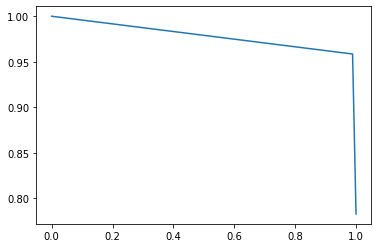

In [68]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_true=y_test, y_pred=y_pred))
print("ROC_AUC score: ", roc_auc_score(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

print("AUPRC score: ", auc(recall, precision))

print("\n")
plt.plot(recall, precision)
plt.show()

Accuracy:  0.9978914708356549
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     19894
           1       1.00      1.00      1.00     71639

    accuracy                           1.00     91533
   macro avg       1.00      1.00      1.00     91533
weighted avg       1.00      1.00      1.00     91533

Confusion Matrix: 
 [[19783   111]
 [   82 71557]]
ROC_AUC score:  0.9966379001718503
AUPRC score:  0.9991012077244577




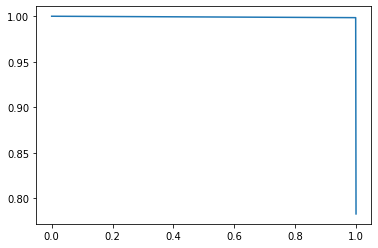

In [69]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_true=y_test, y_pred=y_pred))
print("ROC_AUC score: ", roc_auc_score(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

print("AUPRC score: ", auc(recall, precision))
print("\n")
plt.plot(recall, precision)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:  0.9978259207061934
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     19894
           1       1.00      1.00      1.00     71639

    accuracy                           1.00     91533
   macro avg       1.00      0.99      1.00     91533
weighted avg       1.00      1.00      1.00     91533

Confusion Matrix: 
 [[19695   199]
 [    0 71639]]
ROC_AUC score:  0.9949984920076406
AUPRC score:  0.9986149391686852




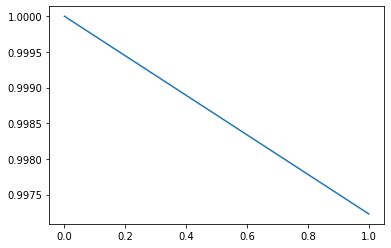

In [70]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=0, )
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_true=y_test, y_pred=y_pred))
print("ROC_AUC score: ", roc_auc_score(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

print("AUPRC score: ", auc(recall, precision))
print("\n")
plt.plot(recall, precision)
plt.show()